In [91]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0)

In [115]:
class LogisticRegression():
  def __init__(self, batch_size, n_feature):
    self.batch_size = batch_size
    np.random.seed(0)
    self.theta = np.random.uniform(size=(n_feature, 1))
    
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def loss(self, y, y_hat):
    y_hat = np.clip(y_hat, 1e-6, 1 - 1e-6)
    return (- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

  def gradient(self, X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / self.batch_size

  def predict(self, X):
    z = np.dot(X, self.theta)
    return self.sigmoid(z)

  def getBatchData(self, X, y, number_batch_size, last_size, ith_batch):

    if ith_batch == number_batch_size - 1 and last_size != 0:
      X_batch = X[ith_batch * self.batch_size : (ith_batch * self.batch_size) + last_size + 1]
      y_batch = y[ith_batch * self.batch_size : (ith_batch * self.batch_size) + last_size + 1]
    else:
      X_batch = X[ith_batch * self.batch_size : (ith_batch + 1) * self.batch_size + 1]
      y_batch = y[ith_batch * self.batch_size : (ith_batch + 1) * self.batch_size + 1]

    return X_batch, y_batch.reshape(-1, 1)
  
  def accuracy(self, y_train, y_hat):
    y_hat = np.round(y_hat)
    return (y_train == y_hat).mean()

  def fit(self, X_train, y_train, X_val, y_val, n_iters, learning_rate):
    history = {"losses_train": [], "accs_train": [], "losses_val": [], "accs_val": []}
    last_size = 0

    if len(X_train) % self.batch_size == 0:
      number_batch_size = int(len(X_train) / self.batch_size)
    else:
      number_batch_size = int(len(X_train) / self.batch_size) + 1
      last_size = len(X_train) - self.batch_size * number_batch_size
    
    for epoch in tqdm(range(n_iters)):
      for ith_batch in range(0, number_batch_size):
        # get X_batch, y_batch
        X_train_batch, y_train_batch = self.getBatchData(X_train, y_train, number_batch_size, last_size, ith_batch)
        # predict
        y_train_batch_hat = self.predict(X_train_batch)

        # calculate the gradient
        gradient = self.gradient(X_train_batch, y_train_batch, y_train_batch_hat)
        
        # update theta
        self.theta -= learning_rate * gradient
        
        # calculate loss and accuracy of train sets
        y_train_hat = self.predict(X_train)
        loss = self.loss(y_train, y_train_hat)
        history['losses_train'].append(loss)
        acc = self.accuracy(y_train, y_train_hat)
        history['accs_train'].append(acc)

        # calculate loss and accuracy of validation sets
        y_val_hat = self.predict(X_val)
        loss_val = self.loss(y_val, y_val_hat)
        history['losses_val'].append(loss_val)
        acc_val = self.accuracy(y_val, y_val_hat)
        history['accs_val'].append(acc_val)

      if epoch % 10 == 0:
        print("Epoch: {}, loss: {}, acc: {}, loss_val: {}, acc_val: {}".format(epoch, loss, acc, loss_val, acc_val))
    return history


# Titanic data

In [93]:
path_csv = "data/titanic_modified_dataset.csv"
titanic_data_df = pd.read_csv(path_csv, index_col="PassengerId")
titanic_data_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [94]:
# convert to numpy array
titanic_data_arr = titanic_data_df.to_numpy().astype(np.float64)
# shuffle data
idx = np.arange(titanic_data_arr.shape[0])
np.random.shuffle(idx)
titanic_data_arr = titanic_data_arr[idx]

In [95]:
# devide features to X, label to y 
X, y = titanic_data_arr[:, :-1], titanic_data_arr[:, -1]
print(X.shape)
print(y.shape)

(891, 8)
(891,)


In [96]:
# add bias to X
bias = np.ones((X.shape[0], 1))
X = np.append(X, bias, axis=1)
print(X.shape)

(891, 9)


In [97]:
train_ratio = 0.7
validation_ratio = 0.2
test_ratio = 0.1

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(623, 9) (178, 9) (90, 9)
(623,) (178,) (90,)


## Training

In [105]:
n_features = X.shape[1]
n_iters = 100

### Batch_size = 1, learning_rate = 0.0001

In [116]:
batch_size = 1
learning_rate = 0.0001
LRModel = LogisticRegression(batch_size, n_features)
history = LRModel.fit(x_train, y_train, x_val, y_val, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

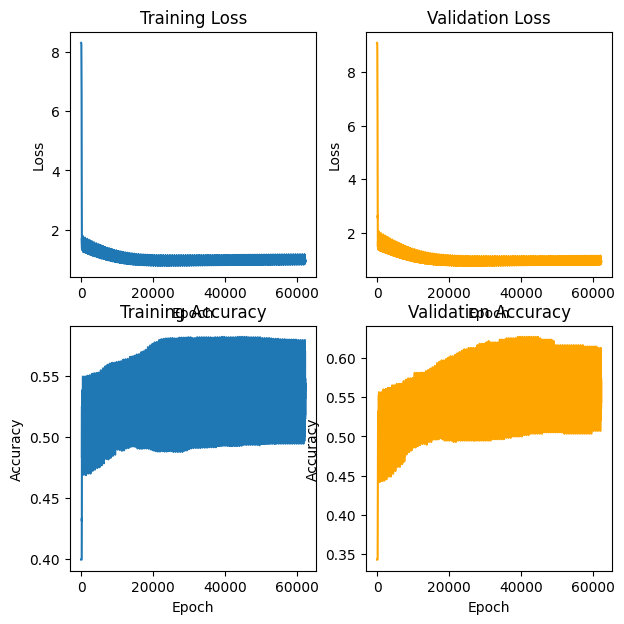

In [110]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## batch_size = 32, learning_rate = 0.001

In [111]:
batch_size = 32
learning_rate = 0.001
LRModel = LogisticRegression(batch_size, n_features)
history = LRModel.fit(x_train, y_train, x_val, y_val, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0, loss: 7.9220429798422325, acc: 0.3996789727126806, loss_val: 8.659096420220324, acc_val: 0.34269662921348315
Epoch: 10, loss: 1.2922253466227271, acc: 0.522060964267035, loss_val: 1.4312511660079925, acc_val: 0.5017674536043429
Epoch: 20, loss: 1.2429598005240536, acc: 0.5239933115021037, loss_val: 1.3714246235058194, acc_val: 0.5070698144173715
Epoch: 30, loss: 1.196558575093842, acc: 0.5243153693746151, loss_val: 1.314415100864207, acc_val: 0.515907082439086
Epoch: 40, loss: 1.153182409870341, acc: 0.5259256587371725, loss_val: 1.2604734218317013, acc_val: 0.5194419896477718
Epoch: 50, loss: 1.1129842271057255, acc: 0.5252815429921495, loss_val: 1.209841376633066, acc_val: 0.5194419896477718
Epoch: 60, loss: 1.0760979753903872, acc: 0.525603600864661, loss_val: 1.1627334411355703, acc_val: 0.5176745360434288
Epoch: 70, loss: 1.0426229332338408, acc: 0.5252815429921495, loss_val: 1.1193174197940612, acc_val: 0.5194419896477718
Epoch: 80, loss: 1.0126059649730754, acc: 0.5249

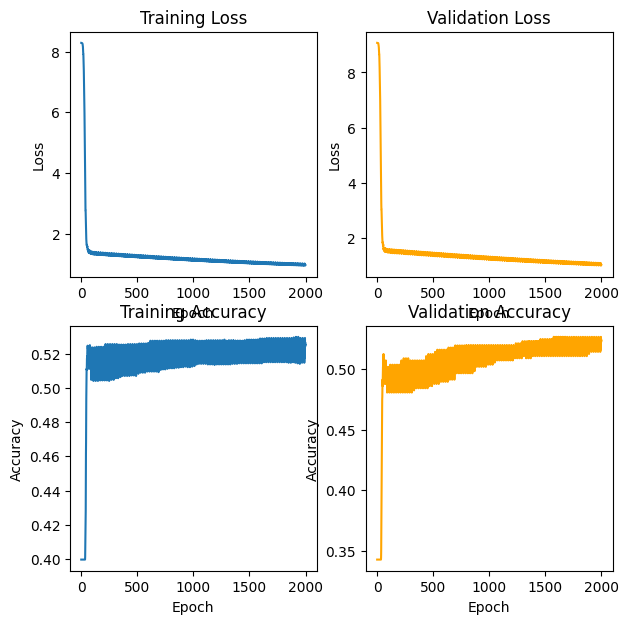

In [112]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

## batch_size = n_sample, learning_rate = 0.001

In [114]:
batch_size = len(x_train)
learning_rate = 0.001
LRModel = LogisticRegression(batch_size, n_features)
history = LRModel.fit(x_train, y_train, x_val, y_val, n_iters, learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0, loss: 8.2930480574707, acc: 0.3996789727126806, loss_val: 9.073442470345865, acc_val: 0.34269662921348315
Epoch: 10, loss: 8.276647850102352, acc: 0.3996789727126806, loss_val: 9.058000615752437, acc_val: 0.34269662921348315
Epoch: 20, loss: 7.78123250936091, acc: 0.3996789727126806, loss_val: 8.503828588303493, acc_val: 0.34269662921348315
Epoch: 30, loss: 5.632962115961279, acc: 0.3996789727126806, loss_val: 5.969699185437524, acc_val: 0.34269662921348315
Epoch: 40, loss: 2.4636919863631612, acc: 0.4418685540116817, loss_val: 2.738613880248669, acc_val: 0.4116273197828557
Epoch: 50, loss: 1.6238677895694302, acc: 0.5162639225618286, loss_val: 1.799427284497129, acc_val: 0.49646509279131423
Epoch: 60, loss: 1.4725759666069715, acc: 0.5201286170319662, loss_val: 1.602771849832745, acc_val: 0.5035349072086858
Epoch: 70, loss: 1.408723812125932, acc: 0.5201286170319662, loss_val: 1.5477355746874897, acc_val: 0.4982325463956571
Epoch: 80, loss: 1.375540104623299, acc: 0.51948450

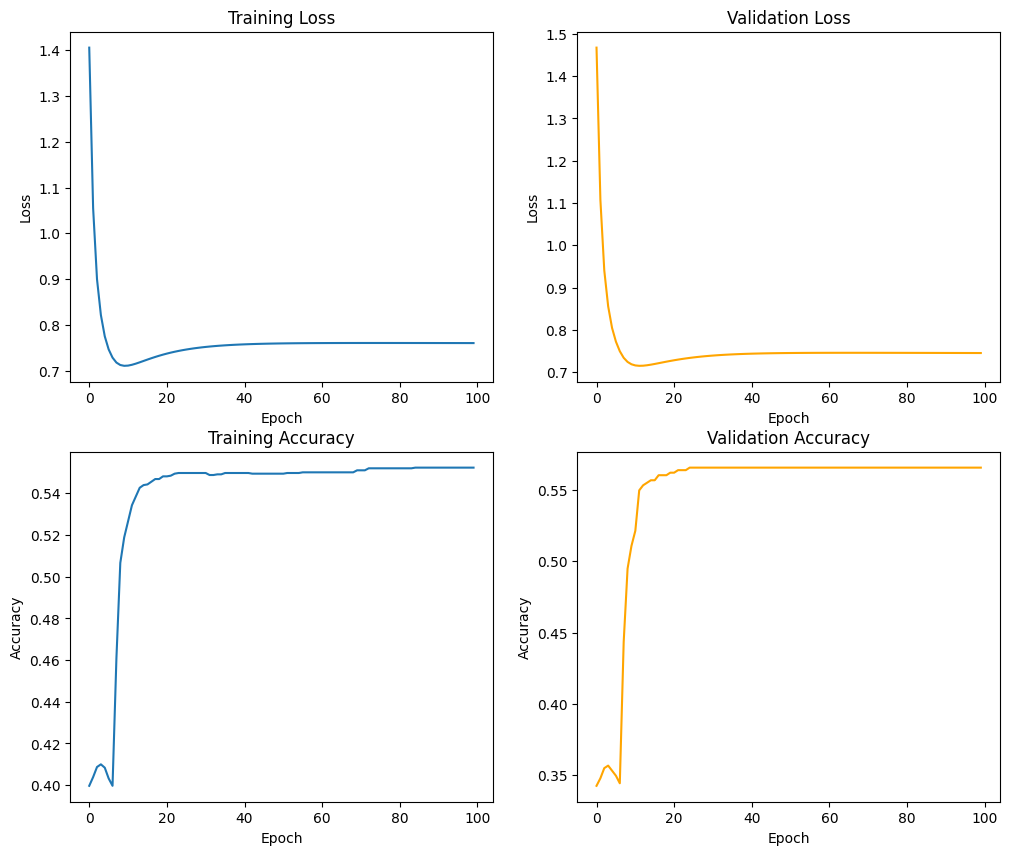

In [89]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7))
ax[0, 0].plot(history["losses_train"])
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(history['losses_val'], 'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(history['accs_train'])
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(history['accs_val'], 'orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()